# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

<AxesSubplot:xlabel='year'>

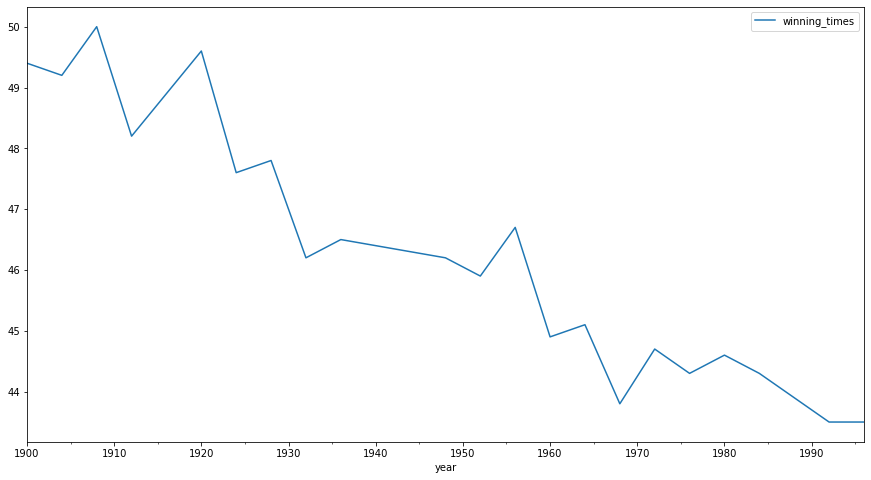

In [3]:
# Plot the time series
data.plot(figsize=(15,8))

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [4]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

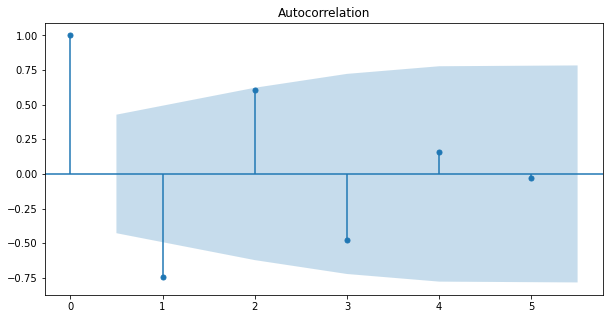

In [5]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig,ax=plt.subplots(figsize=(10,5))
plot_acf(data_diff,ax=ax,lags=5);


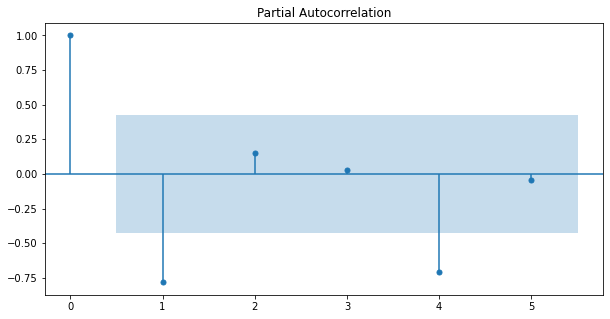

In [6]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig,ax=plt.subplots(figsize=(10,5))
plot_pacf(data_diff,ax=ax,lags=5);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [7]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

In [9]:
#Fitting AR of order 1
ar1=ARMA(data_diff,order=(1,0))
model1=ar1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Sun, 21 Aug 2022   AIC                             46.107
Time:                        10:58:09   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.000      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3916           +0.0000j            1.3916            0.5000
-----------------------------------------------------------------------------
"""

In [11]:
# Fitting a model with MA of order 1
ma1=ARMA(data_diff,order=(0,1))
model2=ma1.fit()
model2.summary()

C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(0, 1)   Log Likelihood                 -22.654
Method:                       css-mle   S.D. of innovations              0.661
Date:                Sun, 21 Aug 2022   AIC                             51.308
Time:                        10:59:47   BIC                             54.442
Sample:                    12-31-1904   HQIC                            51.988
                         - 12-31-1996                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3108      0.022    -13.990      0.000      -0.354      -0.267
ma.L1.winning_times    -1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [12]:
#Fitting a model with AR(1) and MA(1)
ar1_ma1=ARMA(data_diff,order=(1,1))
model3=ar1_ma1.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 1)   Log Likelihood                 -19.958
Method:                       css-mle   S.D. of innovations              0.615
Date:                Sun, 21 Aug 2022   AIC                             47.916
Time:                        11:01:10   BIC                             52.094
Sample:                    12-31-1904   HQIC                            48.822
                         - 12-31-1996                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2850      0.086     -3.298      0.001      -0.454      -0.116
ar.L1.winning_times    -0.7708      0.160     -4.826      0.000      -1.084      -0.458
ma.L1.winning_times     0.1172      0.254      0.462      0.644      -0.380       0.614
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2974           +0.0000j            1.2974            0.5000
MA.1           -8.5305           +0.0000j            8.5305            0.5000
-----------------------------------------------------------------------------
"""

In [16]:
#Fitting model with AR(3) and MA(2)
ar3_ma2=ARMA(data_diff,order=(3,2))
model4=ar3_ma2.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(3, 2)   Log Likelihood                 -16.471
Method:                       css-mle   S.D. of innovations              0.461
Date:                Sun, 21 Aug 2022   AIC                             46.941
Time:                        11:03:26   BIC                             54.253
Sample:                    12-31-1904   HQIC                            48.528
                         - 12-31-1996                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2723      0.098     -2.786      0.005      -0.464      -0.081
ar.L1.winning_times    -1.7674      0.260     -6.800      0.000      -2.277      -1.258
ar.L2.winning_times    -0.9373      0.471     -1.988      0.047      -1.861      -0.013
ar.L3.winning_times    -0.0106      0.255     -0.041      0.967      -0.511       0.489
ma.L1.winning_times     1.5688      0.220      7.133      0.000       1.138       2.000
ma.L2.winning_times     1.0000      0.250      4.003      0.000       0.510       1.490
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9574           -0.4170j            1.0442           -0.4346
AR.2           -0.9574           +0.4170j            1.0442            0.4346
AR.3          -86.9100           -0.0000j           86.9100           -0.5000
MA.1           -0.7844           -0.6202j            1.0000           -0.3935
MA.2           -0.7844           +0.6202j            1.0000            0.3935
-----------------------------------------------------------------------------
"""

In [18]:
#Fitting model with AR(2) AND MA(3)
ar2_ma3=ARMA(data_diff,order=(2,3))
model5=ar2_ma3.fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 3)   Log Likelihood                 -16.470
Method:                       css-mle   S.D. of innovations              0.461
Date:                Sun, 21 Aug 2022   AIC                             46.941
Time:                        11:04:38   BIC                             54.252
Sample:                    12-31-1904   HQIC                            48.528
                         - 12-31-1996                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2725      0.098     -2.788      0.005      -0.464      -0.081
ar.L1.winning_times    -1.7554      0.109    -16.165      0.000      -1.968      -1.543
ar.L2.winning_times    -0.9167      0.099     -9.285      0.000      -1.110      -0.723
ma.L1.winning_times     1.5539      0.374      4.158      0.000       0.821       2.286
ma.L2.winning_times     0.9762      0.559      1.748      0.080      -0.119       2.071
ma.L3.winning_times    -0.0151      0.320     -0.047      0.962      -0.641       0.611
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9575           -0.4173j            1.0444           -0.4346
AR.2           -0.9575           +0.4173j            1.0444            0.4346
MA.1           -0.7845           -0.6201j            1.0000           -0.3935
MA.2           -0.7845           +0.6201j            1.0000            0.3935
MA.3           66.0411           -0.0000j           66.0411           -0.0000
-----------------------------------------------------------------------------
"""

## What is your final model? Why did you pick this model?

In [19]:
# Your comments here
"""
If we use AIC to select our model, the best model would be model 1 (ARMA(1,0)) as it has the lowest AIC of all the 5 models.

In the case where we use BIC to selct our model, the best model would be model with the lowest BIC.
Therefore we can conclude that model 1 is our final model having the lowest BIC and AIC.
"""


'\nIf we use AIC to select our model, the best model would be model 1 (ARMA(1,0)) as it has the lowest AIC of all the 5 models.\n\nIn the case where we use BIC to selct our model, the best model would be model with the lowest BIC.\nTherefore we can conclude that model 1 is our final model having the lowest BIC and AIC.\n'

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 